In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.shape

(26707, 34)

In [ ]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
df = df.drop(["has_health_insur"],axis=1)
df.shape

(26707, 33)

In [ ]:
median1 = df["h1n1_worry"].median()
median1
df["h1n1_worry"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["h1n1_awareness"].median()
median1
df["h1n1_awareness"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["antiviral_medication"].median()
median1
df["antiviral_medication"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["contact_avoidance"].median()
median1
df["contact_avoidance"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["bought_face_mask"].median()
median1
df["bought_face_mask"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["wash_hands_frequently"].median()
median1
df["wash_hands_frequently"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["avoid_large_gatherings"].median()
median1
df["avoid_large_gatherings"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["reduced_outside_home_cont"].median()
median1
df["reduced_outside_home_cont"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["avoid_touch_face"].median()
median1
df["avoid_touch_face"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["dr_recc_h1n1_vacc"].median()
median1
df["dr_recc_h1n1_vacc"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["dr_recc_seasonal_vacc"].median()
median1
df["dr_recc_seasonal_vacc"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["chronic_medic_condition"].median()
median1
df["chronic_medic_condition"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["cont_child_undr_6_mnths"].median()
median1
df["cont_child_undr_6_mnths"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["is_health_worker"].median()
median1
df["is_health_worker"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["is_h1n1_vacc_effective"].median()
median1
df["is_h1n1_vacc_effective"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["is_h1n1_risky"].median()
median1
df["is_h1n1_risky"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["sick_from_h1n1_vacc"].median()
median1
df["sick_from_h1n1_vacc"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["is_seas_vacc_effective"].median()
median1
df["is_seas_vacc_effective"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["is_seas_risky"].median()
median1
df["is_seas_risky"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["sick_from_seas_vacc"].median()
median1
df["sick_from_seas_vacc"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["no_of_adults"].median()
median1
df["no_of_adults"].replace(np.nan,median1,inplace=True)

In [ ]:
median1 = df["no_of_children"].median()
median1
df["no_of_children"].replace(np.nan,median1,inplace=True)

In [ ]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

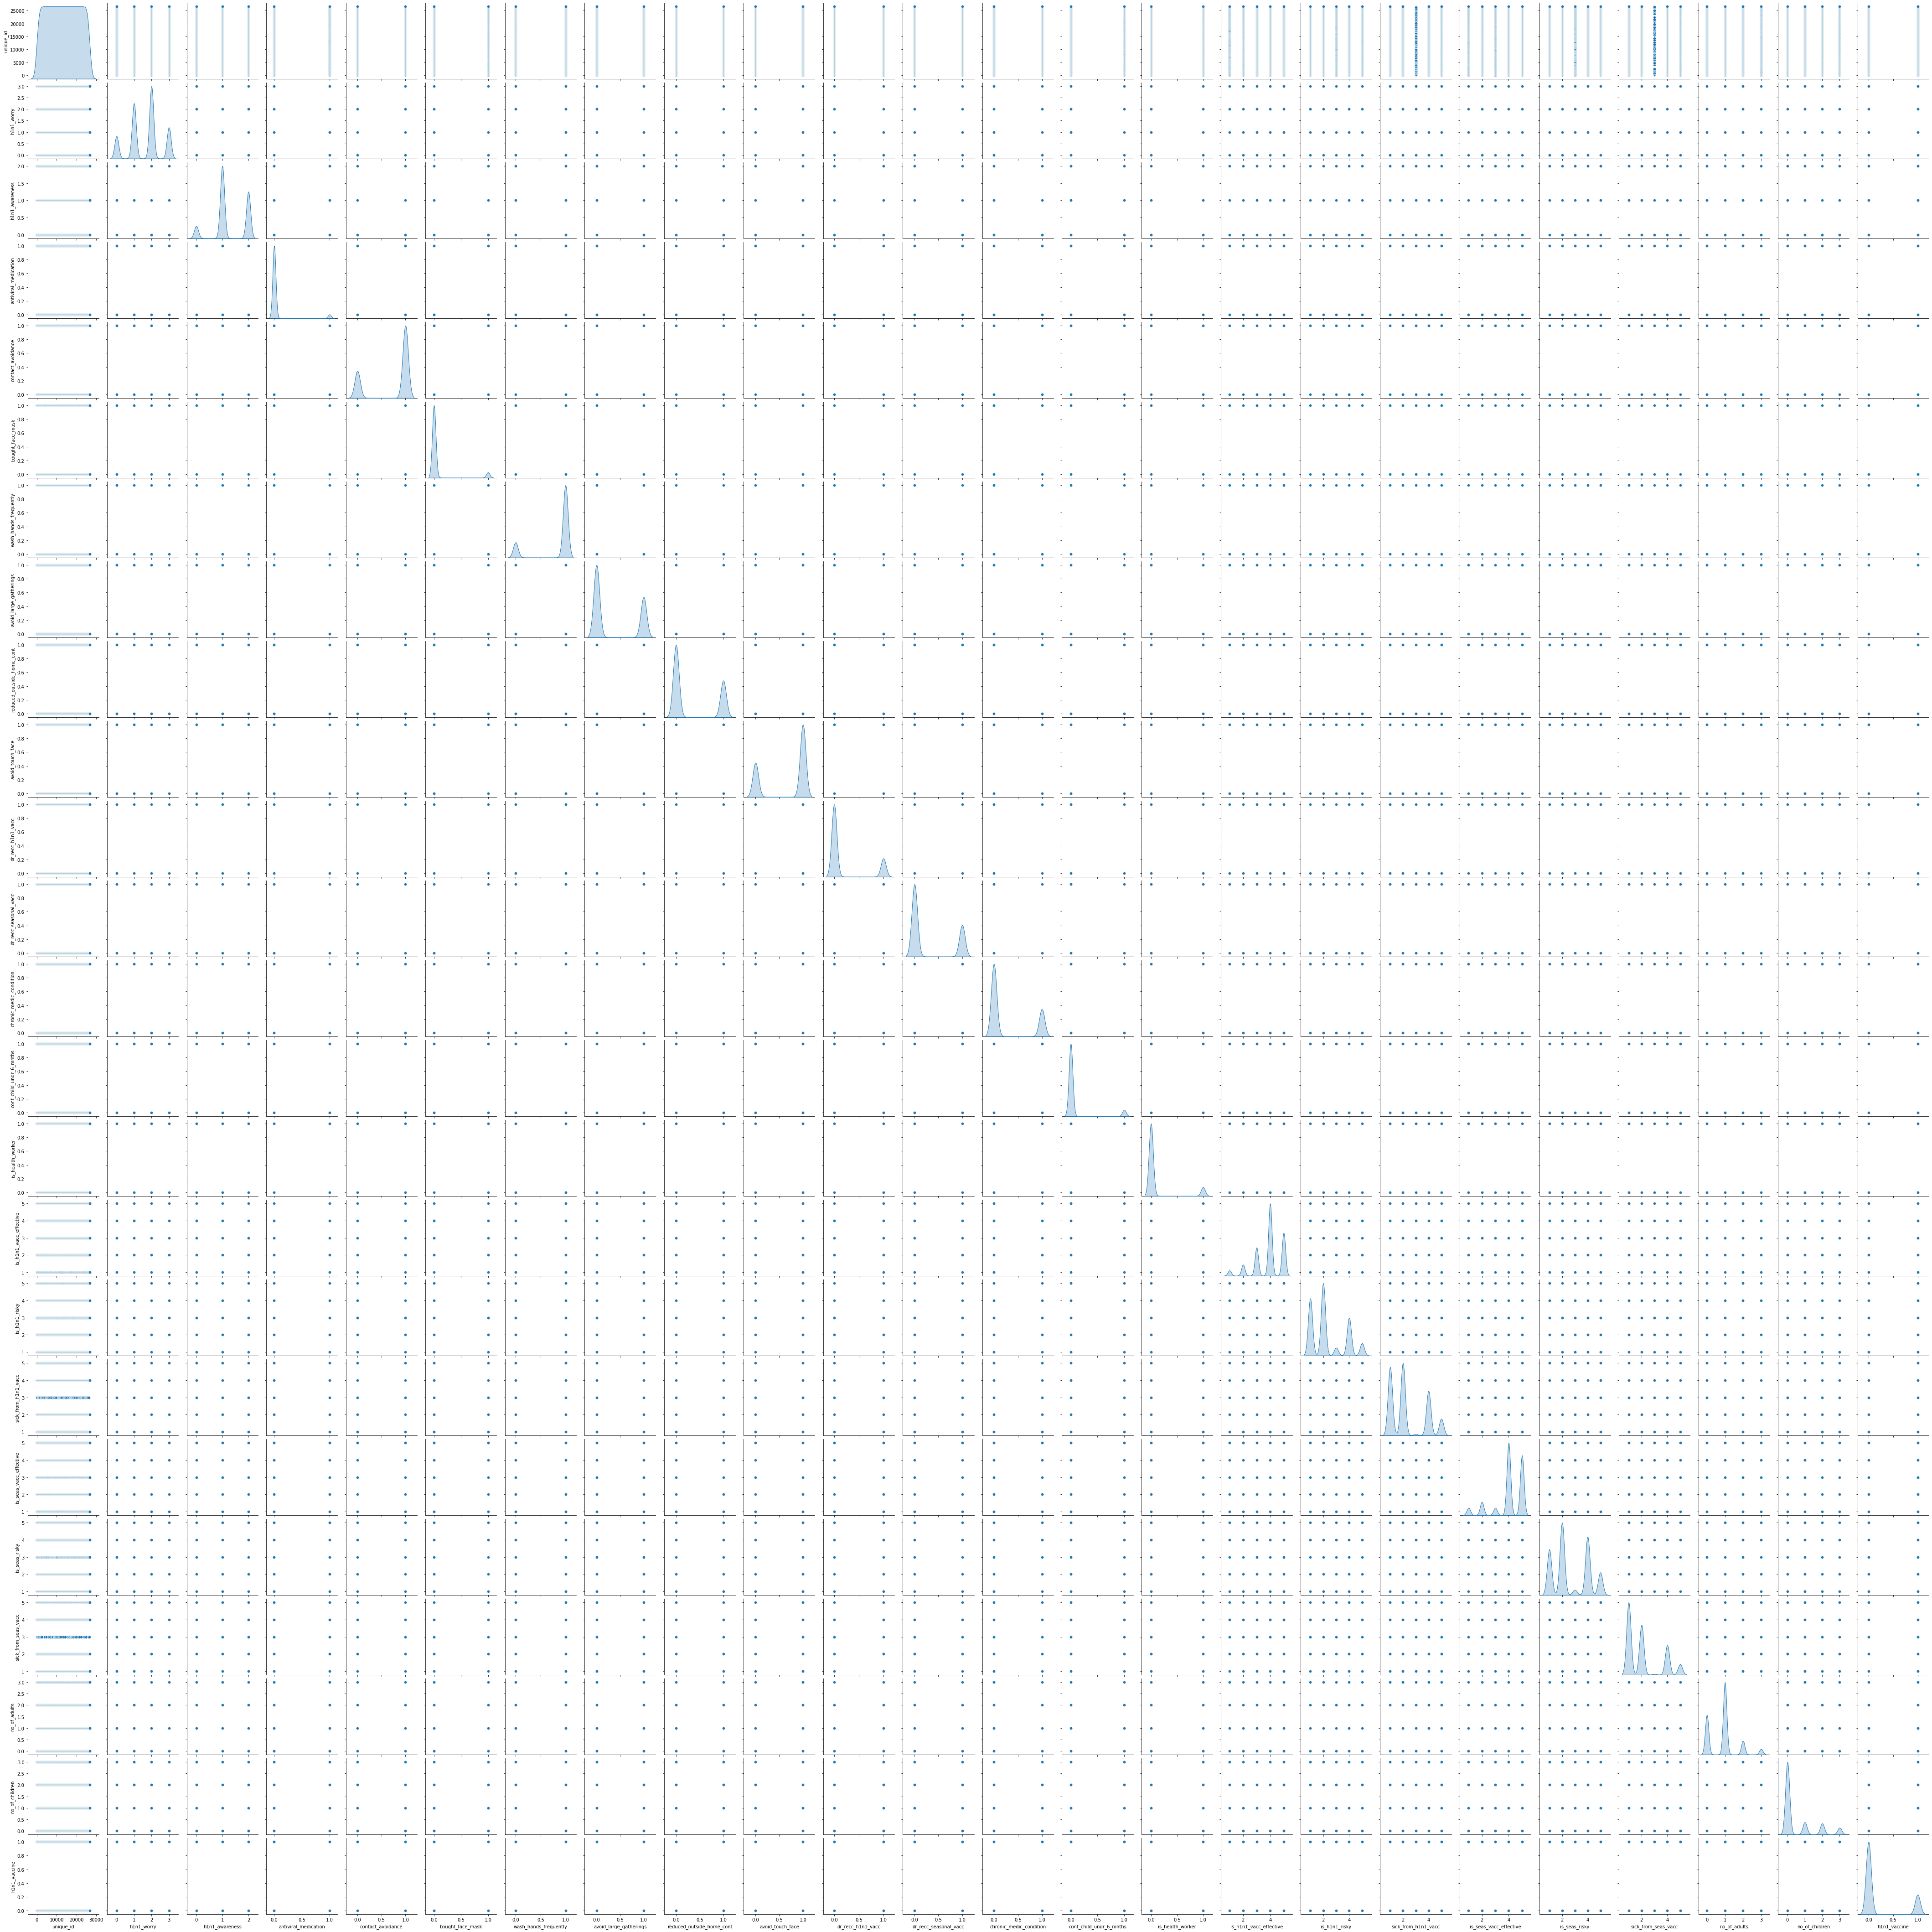

In [ ]:
sns.pairplot(df , diag_kind='kde')

In [ ]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [ ]:
df.drop(['age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa'],axis=1,inplace=True)

In [ ]:
X = df.drop(["h1n1_vaccine"], axis=1)
#dependent variable
Y= df["h1n1_vaccine"]

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y ,test_size=0.30, random_state=1)

In [ ]:
model_1 = LinearRegression()

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [ ]:
model_1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model_1.score(X_train, Y_train)

0.25292428754339924

In [ ]:
model_1.score(X_test, Y_test)

0.2662123504482883

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_2=SVR()
model_2.fit(X_train,Y_train)

SVR()

In [ ]:
model_2.score(X_train,Y_train)

-0.07651052712643636

In [ ]:
model_2.score(X_test,Y_test)

-0.07273137027150334

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_3= DecisionTreeRegressor( max_depth=2)

In [ ]:
model_3.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
model_3.score(X_train,Y_train)

0.2032298795068358

In [ ]:
model_3.score(X_test,Y_test)

0.21899697604872315

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X_log = np.log(X_train)
y_log = np.log(Y_train)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, Y_train)

# Score
score_knn = knn_model.score(X_test, Y_test)
score_knn

-0.15380569001979705

In [ ]:
# Predictions
preds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': Y_test,
                            'Prediction': preds,
                            'Error': Y_test - preds})
# View
performance

,True Value,Prediction,Error
25567,0,0.2,-0.2
6023,0,0.2,-0.2
22055,1,0.4,0.6
7914,0,0.2,-0.2
12380,0,0.0,0.0
...,...,...,...
17077,0,0.0,0.0
6729,1,0.4,0.6
22700,0,0.0,0.0
17911,0,0.2,-0.2


In [ ]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

In [ ]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -99.982 (10.299)


In [ ]:
###### Adaboost Regression in Python #######
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)

In [ ]:
#Printing all the parameters of Adaboost
print(RegModel)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=1)


In [ ]:
#Creating the model on Training Data
AB=RegModel.fit(X_train,Y_train)
prediction=AB.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(Y_train, AB.predict(X_train)))

R2 Value: 0.15307787016085084


In [ ]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((Y_test - prediction) / Y_test)) * 100))

Accuracy -inf


In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
#Fit regression model
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.1163


In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.datasets import make_regression
 X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
 regr = RandomForestRegressor(max_depth=2, random_state=0)
 regr.fit(X, y)
RandomForestRegressor(...)
 print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]
